# <a href="https://thetahat.ru/courses/bm-2024-aut"> Статистика ФБМФ </a>

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

## Задача 1
### Функция правдоподобия
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [3]:
def draw_likelihood(density_function, grid, samples, label):
    """Изображает график функции правдоподобия для каждой из 3 выборок.

    Аргументы:
    density_function --- функция, считающая плотность (обычную или дискретную).
        На вход данная функция должна принимать массив размера (1, len_sample)
        и возвращать массив размера (len_grid, len_sample).
    grid --- массив размера (len_grid, 1) --- сетка для построения графика;
    samples --- три выборки;
    label --- latex-код параметрической модели.
    """
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

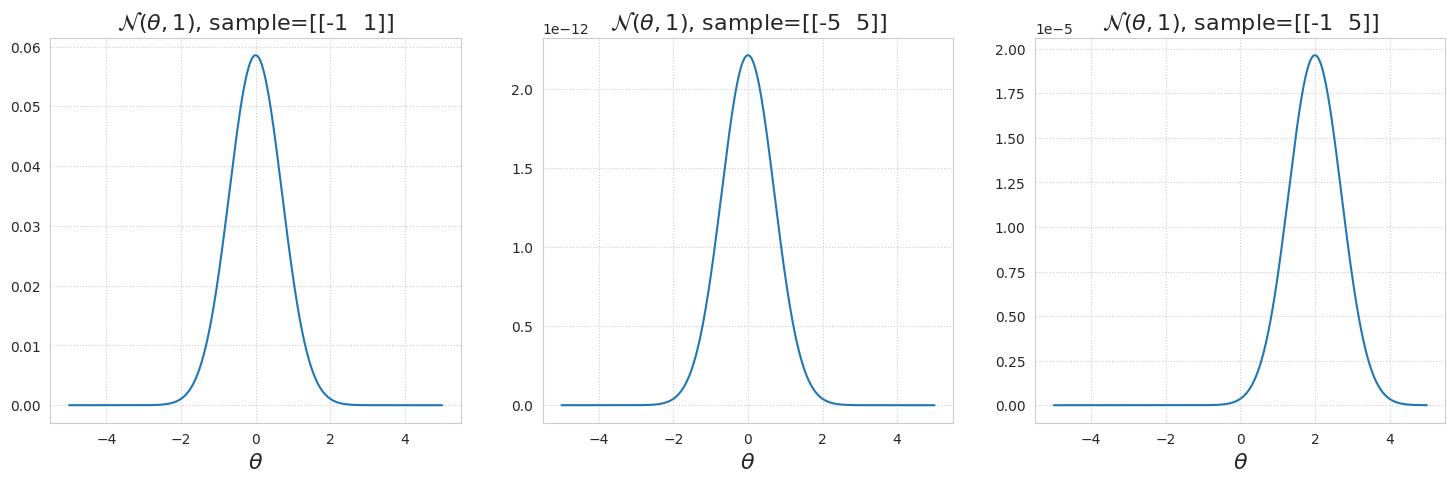

In [4]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid,
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Видно, что с изменение выборки меняется высота пика и значение параметра в этом пике. Для самой маленькой выборки (первый график) наиболее вероятное значение тета равно нулю, для самой большой(второй график) аналогично, однако изменилось значение функции (из-за количества данных). Для третье выборки пик "съехал" на значение два, возможно, это произошло из-за ассиметричности выборки.

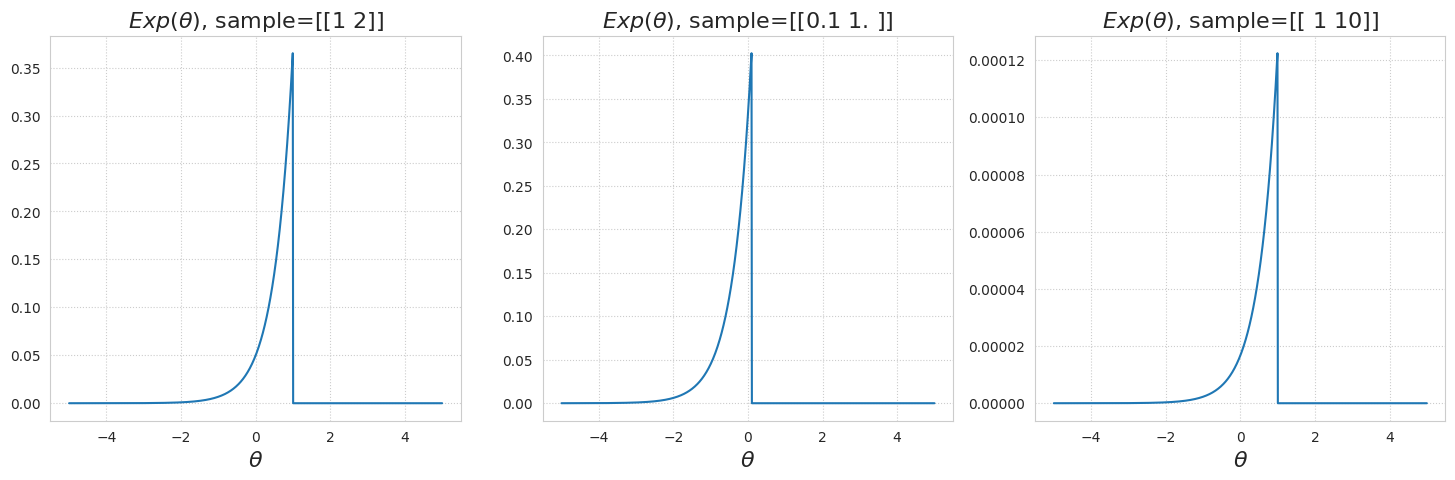

In [5]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(loc=grid).pdf, grid,
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

Выполните остальные:

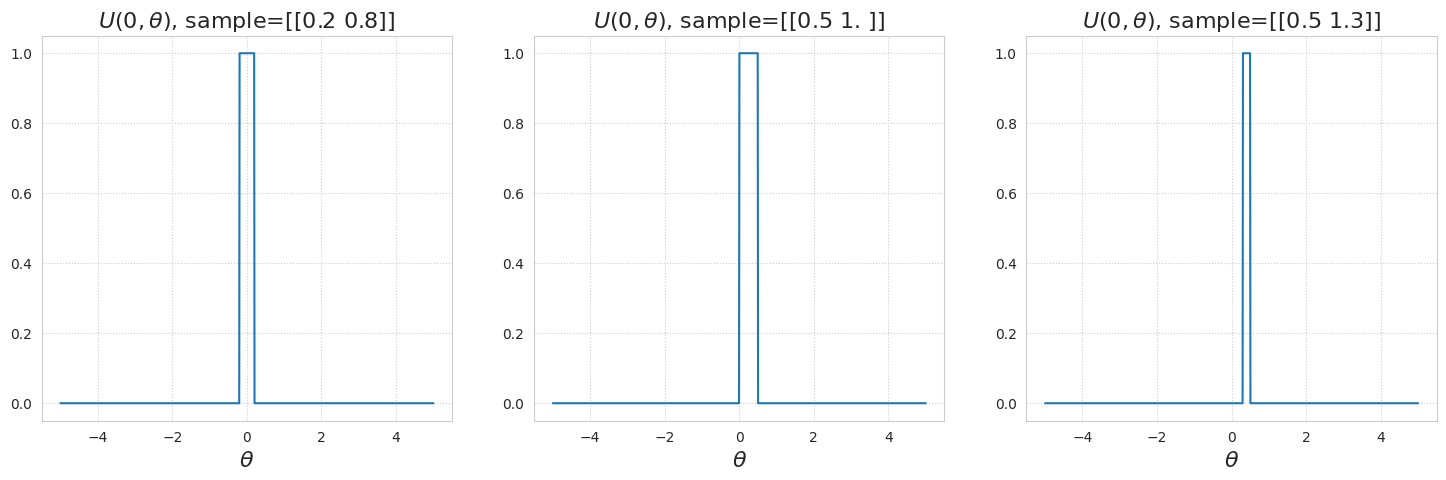

In [7]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(loc=grid).pdf, grid,
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U(0, \\theta)$')

здесь различается ширина пика, это говорит об оценке параметра. Самая неопределеная оценка на выборке [0.5, 1]

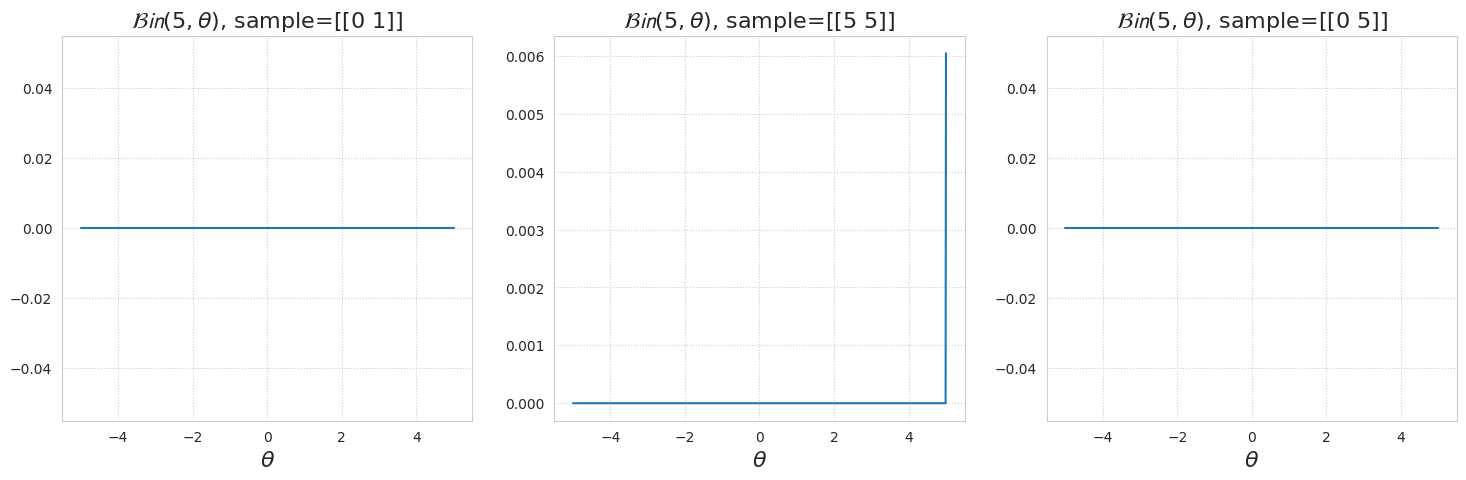

In [9]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=0.4, loc=grid).pmf, grid,
                [[0, 1], [5, 5], [0, 5]], '$\\mathcal{Bin}(5, \\theta)$')


Величина правдоподобия остается постоянной при изменении значения параметра. Верятно, выборка содержит одинаковые или схожие значения, которые не дают дополнительной информации для оценки параметра. Или,например, параметр не является определяющим. Для второго графика можно предположить, что выборка содержит недостаточно информации для точной оценки параметра. Это может быть призойти из-за малого размера выборки ([5,5]).

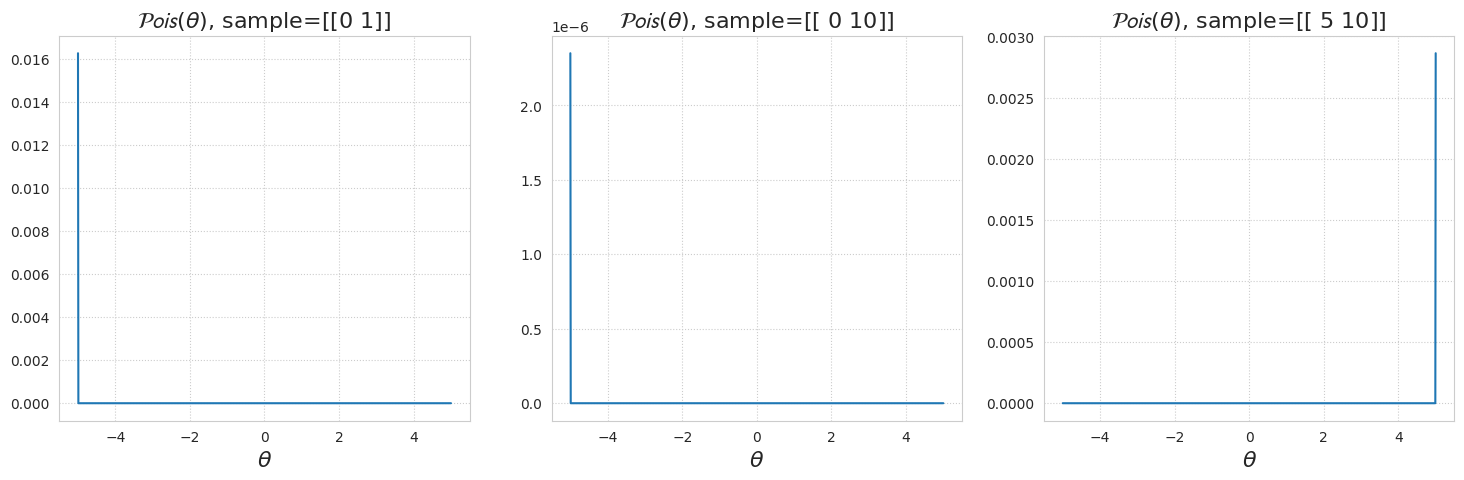

In [10]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=4, loc=grid).pmf, grid,
                [[0, 1], [0, 10], [5, 10]], '$\\mathcal{Pois}(\\theta)$')

Выборки 1 и 5 не пересекаются, графики принимают одинаковую форму, но они зеркальны. Это может говорить о том, что выборки содержат различные характеристики, которые сильно влияют на оценку параметра.

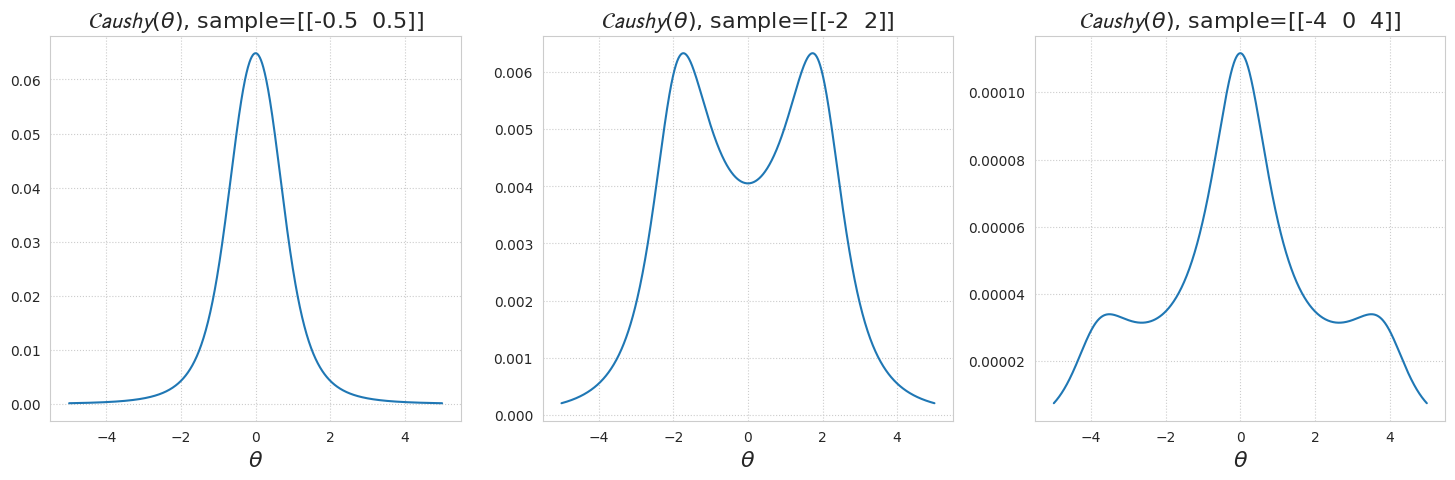

In [11]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid,
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$\\mathcal{Caushy}(\\theta)$')

Различие форм графиков говорит о том, что оценка неустойчива в зависимости от выборки.

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

Не является, это функция от theta, а не от Х.Функция правдоподобия описывает, насколько вероятно наблюдать данные при заданных параметрах модели, и используется для оценки этих параметров.

*Примечание:* В выводе для каждой модели требуется описать, как меняются значения функции (сдвиг, масштаб, форма) при изменении выборки, где достигается максимум, а также какие значения параметра более правдоподобны для данной выборки, какие — менее.

**Вывод:**

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [12]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**


In [13]:
sample = sps.norm.rvs(size=10**5)
log_likelihood = np.sum(sps.norm.logpdf(sample))
likelihood = 2.71**(log_likelihood)
print(likelihood)

0.0


## Задача 2

### Распределение Коши и ОМП
Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi (1 + (x- \theta)^2)}$.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.



**1.** Визуализируйте на одном графики плотности  стандартного нормального распределения и стандартного распределения Коши (т.е. $\theta = 0$). Что можно сказать?


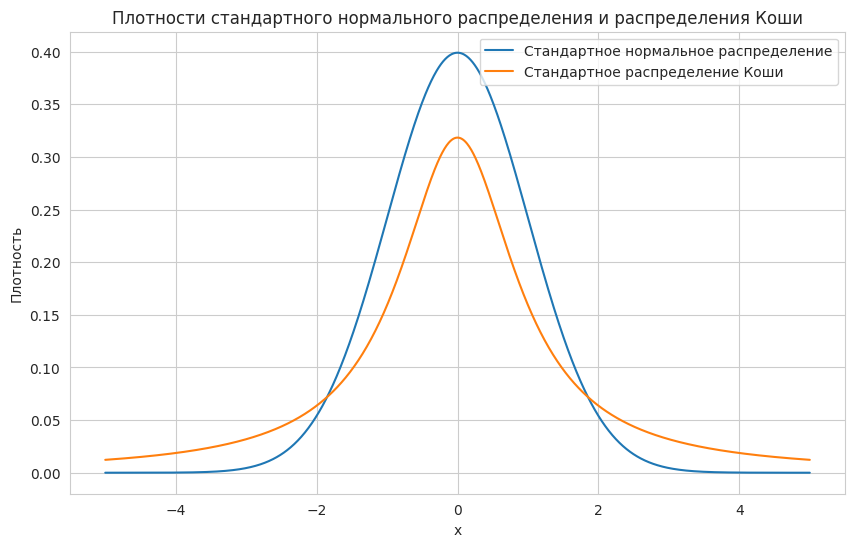

In [15]:
x = np.linspace(-5, 5, 1000)
pdf_norm = sps.norm.pdf(x, 0, 1)
pdf_cauchy = sps.cauchy.pdf(x, 0, 1)


plt.figure(figsize=(10, 6))
plt.plot(x, pdf_norm, label='Стандартное нормальное распределение')
plt.plot(x, pdf_cauchy, label='Стандартное распределение Коши')
plt.title('Плотности стандартного нормального распределения и распределения Коши')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()


**Ответ** оба распределения симметричны относительно нуля, но распределение Коши имеет более тяжелые хвосты

**2.** Повторите эксперимент с <a href="https://thetahat.ru/courses/bm-2024-aut/main/2/seminar_2">семинара 2</a> про закон больших чисел для распределения Коши. Выполняется ли закон?

In [17]:
size = 1000
samples_count = 500

sample = sps.cauchy(loc=0, scale=1).rvs(size=(samples_count, size))
means = sample.cumsum(axis=1) / (np.arange(size) + 1)

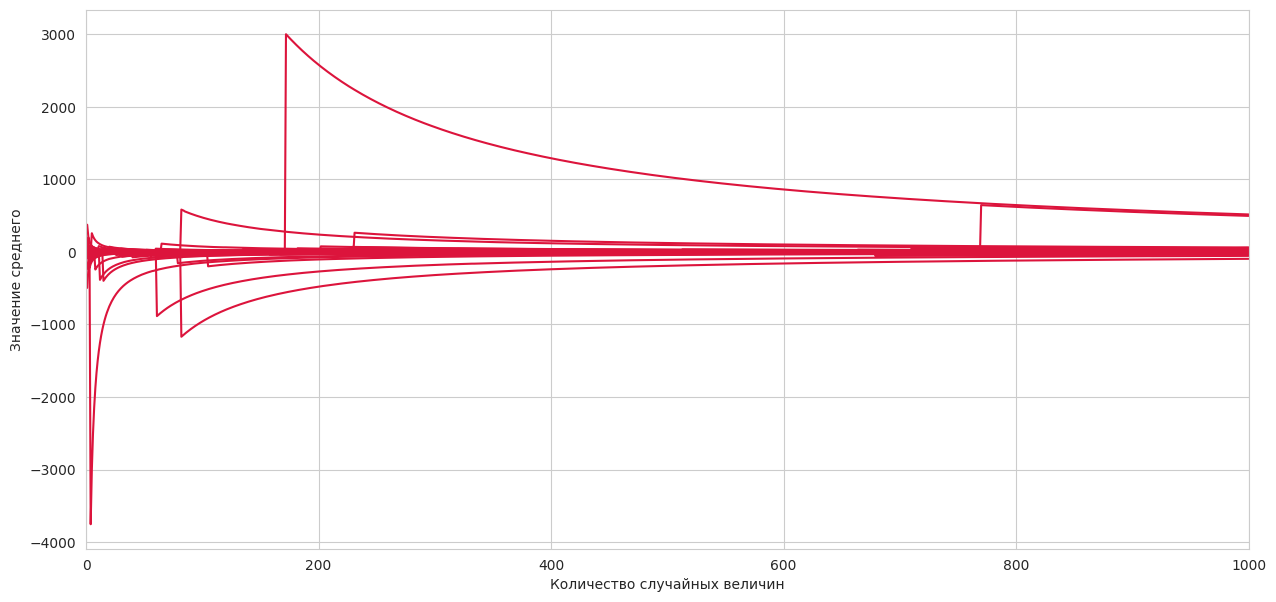

In [18]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));


**Ответ** ЗБЧ не работает, так как для распределения Коши математическое ожидание не определено

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

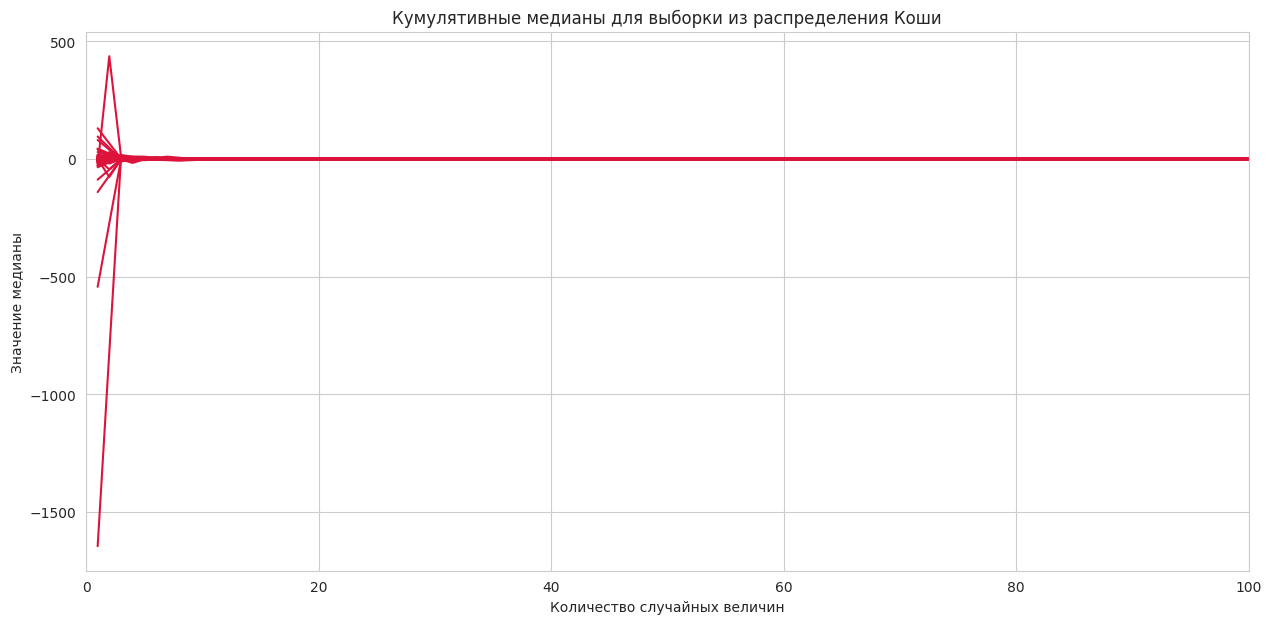

In [21]:
size = 100
samples_count = 500

sample = sps.cauchy(loc=0, scale=1).rvs(size=(samples_count, size))
medians = np.array([np.median(sample[:, :i+1], axis=1) for i in range(size)])

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, medians[:, i], color='crimson')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение медианы')
plt.xlim((0, size))
plt.title('Кумулятивные медианы для выборки из распределения Коши')
plt.grid(True)
plt.show()


**Вывод** медиана более стабильна для распределения Коши. по мере увеличения размера выборки, линии сходятся к 0 (медианы распределения Коши).

**4.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана.

Также, по каждой из этих оценок, вычислите одношаговую оценку.

**Напоминание:** если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(l''_X(\widehat{\theta}_0) \right)^{-1} l'_X(\widehat{\theta}_0)$, где $l_X(\theta)$ — логарифмическая функция правдоподобия. *Заметим, что обычное выборочное среднее не является асимптотически нормальной оценкой, и оценка, вычисленная по формуле выше, формально не является одношаговой, однако ее все равно требуется посчитать.*



In [26]:
def cauchy_one_step_estimation(sample, init_estimation):
    """Вычисляет одношаговую оценку параметра сдвига распределения Коши.

    Аргументы:
        sample -- numpy-массив вещественных чисел; выборка, по которой
            вычисляется одношаговая оценка.
        init_estimation -- вещественное число; асимптотически нормальная оценка,
            по которой вычисляется одношаговая.
    """
    d1 = np.sum(2 * (sample - init_estimation) / (1 + (sample - init_estimation)**2))
    d2 =  -np.sum(2 * (1 - (sample - init_estimation)**2) / (1 + (sample - init_estimation)**2)**2)
    one_step_estimation = init_estimation + d1 / d2
    return one_step_estimation

In [27]:
size = 1000
n = np.arange(1, size + 1)
sample = sps.cauchy(loc=0, scale=1).rvs(size=(size))

avg_estimation = np.array([np.mean(sample[:i]) for i in n])
med_estimation = np.array([np.median(sample[:i]) for i in n])
onestep_med_estimation = np.array([cauchy_one_step_estimation(sample[:i], med_estimation[i-1]) for i in n])

На одном графике изобразите зависимость значений этих оценок от $n$. Для каждой оценки $\widehat{\theta}_0$ соответствующая оценка $\widehat{\theta}_1$ должна быть изображена на графике пунктиром тем же цветом, что и $\widehat{\theta}_0$.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Замечание:** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие.

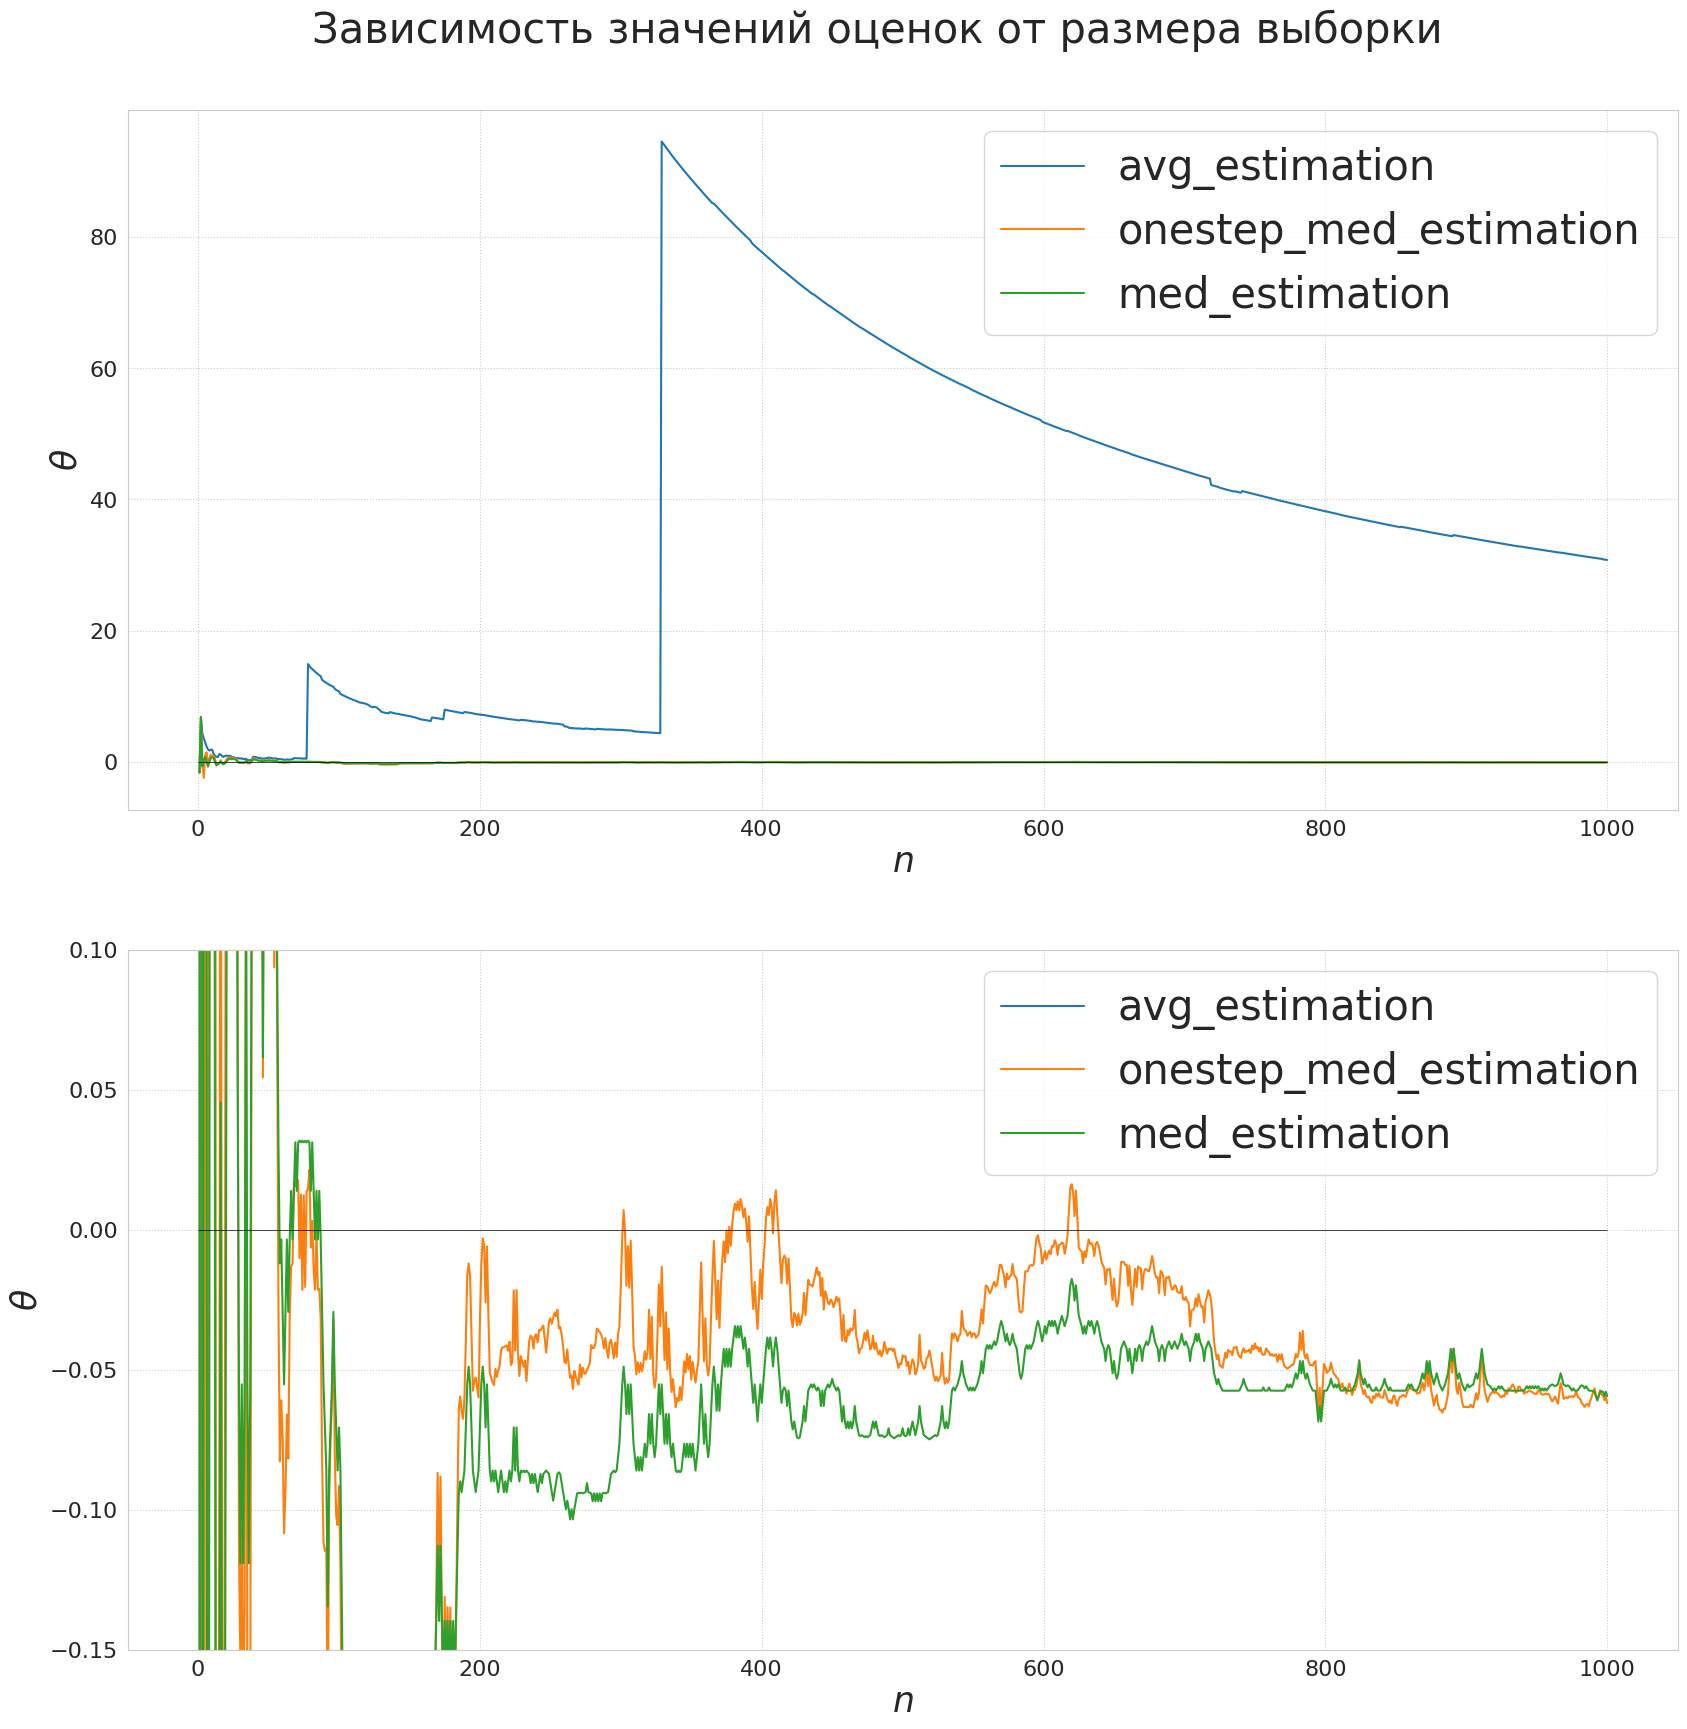

In [28]:
# метки дл каждой оценки
labels = ['$\overline{X}$', '$\widehat{\mu}$', 'one step on $\widehat{\mu}$']


plt.figure(figsize=(20, 20))

for i, ylim in zip([1, 2], [None, (-0.15, 0.1)]):
    plt.subplot(2, 1, i)

    plt.plot(n, avg_estimation, label = 'avg_estimation')
    plt.plot(n, onestep_med_estimation, label = 'onestep_med_estimation')
    plt.plot(n, med_estimation, label = 'med_estimation')

    plt.xlabel('$n$', fontsize=25)
    plt.ylabel('$\\theta$', fontsize=25)

    plt.hlines(0, 0, size, color='black', lw=0.5)
    plt.legend(fontsize=30)
    plt.grid(ls=':')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(ylim)

plt.suptitle('Зависимость значений оценок от размера выборки',
             fontsize=30, y=0.93)

plt.show()





Не забудьте про выводы:  выборочная медиана является наиболее стабильной оценкой для распределения Коши. усеченное среднее также показывает хорошую стабильность. выборочное среднее имеет большую нестабильность, это связано с тем, что математическое ожидание для распределения Коши не определено.oдношаговая оценка на основе выборочной медианы также должна быть стабильной, так как она основывается на медиане